# 03장 다이오드의 응용회로

## 공통 코드

In [1]:
import sys
from pathlib import Path

# common_dir = Path.cwd().parent / "ece2knu_common"
common_dir = Path.cwd()
sys.path.insert(0, str(common_dir))

from common import *

*******************************************************************************

## 3.3 실험 이론

### 3.3.3  리미터회로의 해석

#### 양방향 리미터 회로 회로도 그리기

다음 회로도를 KiCad 로 그린다.

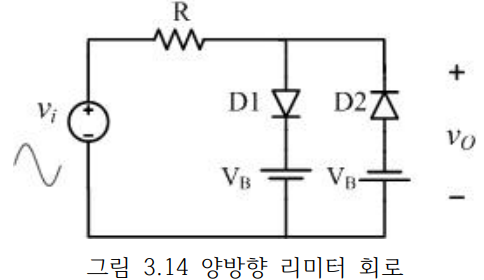

In [2]:
display_image("./images/ch03_03_03_03_circuit.png", width=700)

그린 회로도

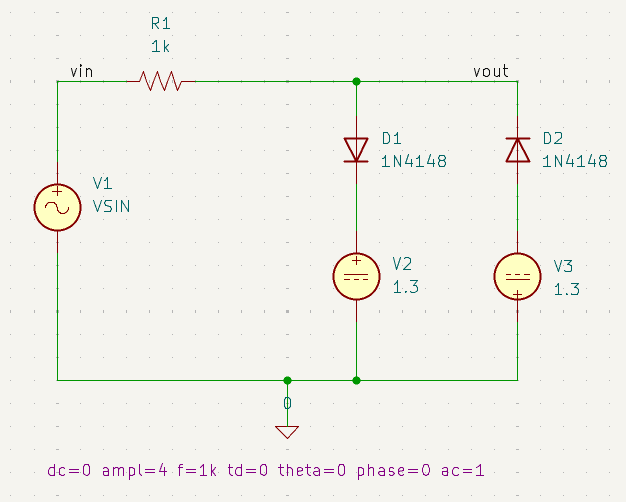

In [3]:
display_image("./data/ch03_03_03_03_result_circuit_cad.png", width=700)

####  회로 시뮬레이션하기

다음 설정으로 시뮬레이션한다.

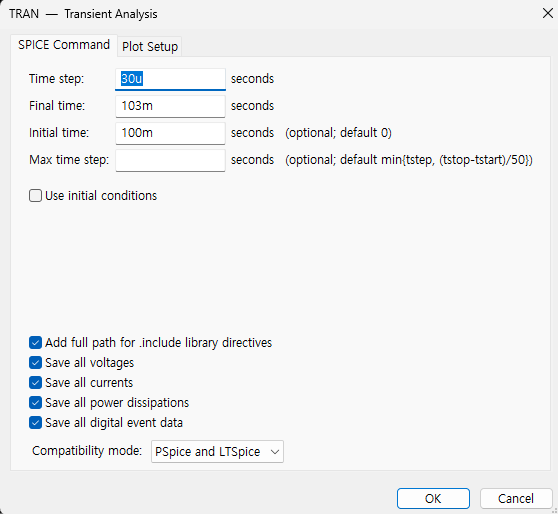

In [4]:
display_image("./images/ch03_03_03_03_sim_setting.png", width=700)

#### 시뮬레이션 결과 관찰한기

##### 결과 그래프 관찰하기

시뮬레이션한 파형을 관찰한다.

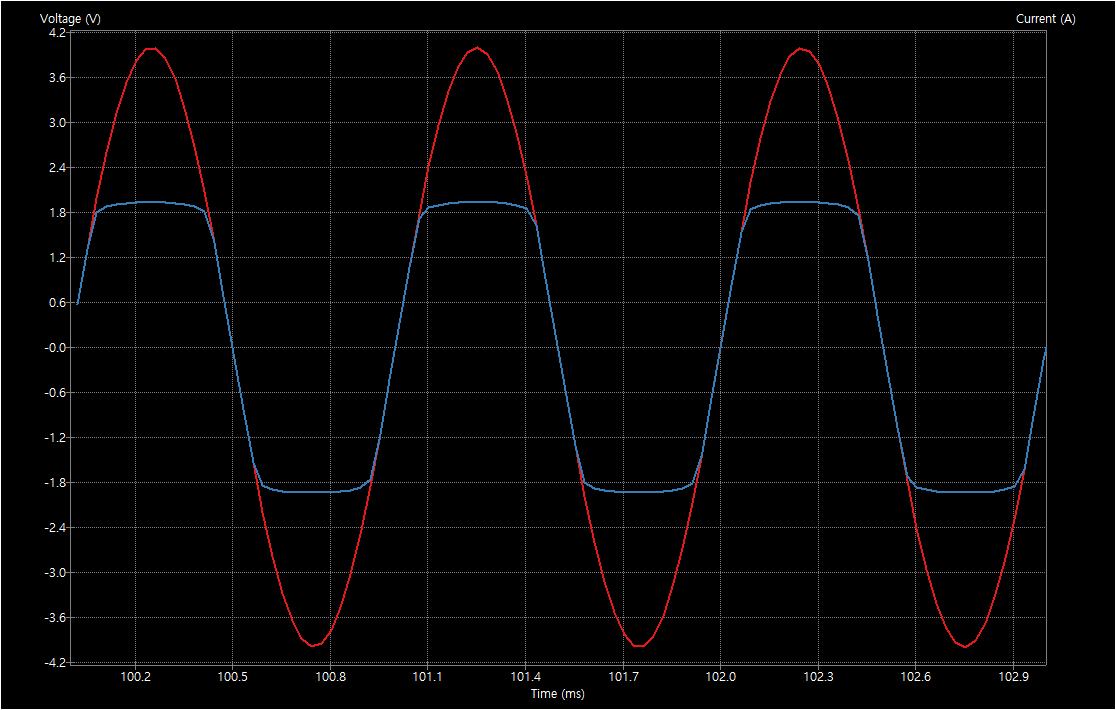

In [5]:
display_image("./data/ch03_03_03_03_result_plot.png", width=700)

시뮬레이션한 데이터를 가져온다.

In [6]:
# 실험 결과 파일을 읽는다.
data = get_simulation_result_kicad('./data/ch03_03_03_03_result_data.csv')

data['time'] : sample number = 101
data['V(/vin)'] : sample number = 101
data['V(/vout)'] : sample number = 101


##### 결과 데이터 분석하기

그래프를 그린다.

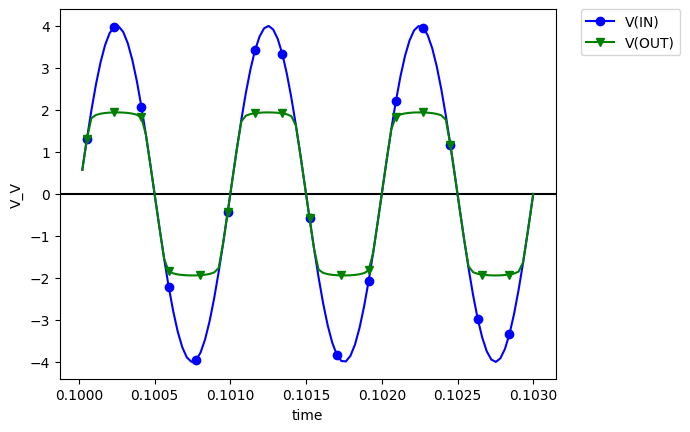

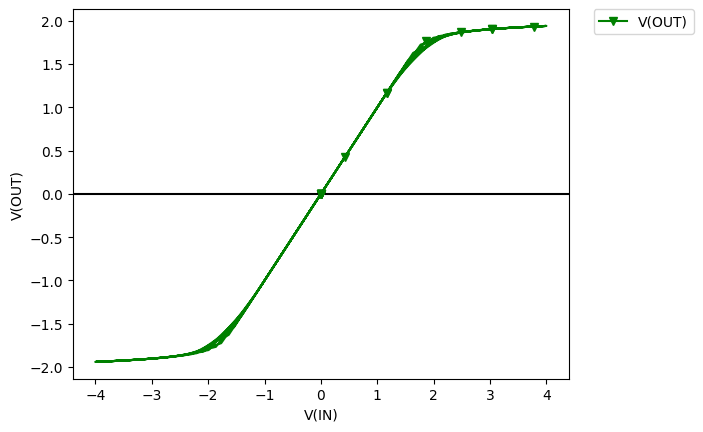

In [7]:
# 실험 결과에서 시간, 입력 전압, 출력 전압을 가져온다.
times = data['time']
vins = data['V(/vin)']
vouts = data['V(/vout)']

# 필터를 적용해 잡음을 줄인다.
# vins = savgol_filter(vins, 100, 2)
# vouts = savgol_filter(vouts, 100, 2)

# 시간을 x축, 전압들을 y축으로 하는 그래프를 그린다.
plt.xlabel('time')
plt.ylabel('V_V')
plt.axhline(0, color='black')
# plt.axvline(0, color='black')
draw_plot(times, vins, 'V(IN)', 0)
draw_plot(times, vouts, 'V(OUT)', 1)
plt.show()


# vin을 x축, vout을 y축으로 하는 그래프를 그린다.
plt.xlabel('V(IN)')
plt.ylabel('V(OUT)')
plt.axhline(0, color='black')
# plt.axvline(0, color='black')
draw_plot(vins, vouts, 'V(OUT)', 1)
plt.show()


## 3.5 실험 내용

### 실험07 제너다이오드의 특성조사: AC측정법 시뮬레이션

#### 제너 다이오그 회로 회로도 그리기

다음 회로를 KiCad 로 그린다.

* R1: 100 Ohm
* R2: 10 Ohm
* 다이오드: 1N5234
* v_i: 정현파, 주파수 100 Hz, 진폭: 20 Vpp

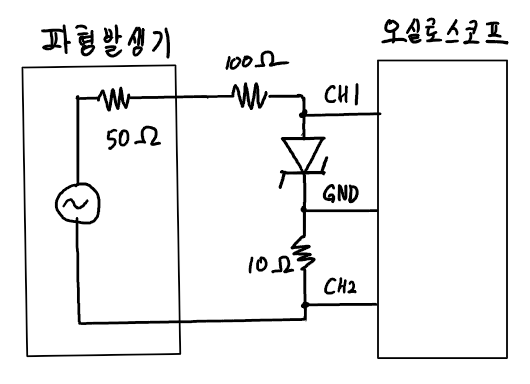

In [8]:
display_image("./images/ch03_05_ep7_01_circuit_diagram.png", width=700)

그린 회로도

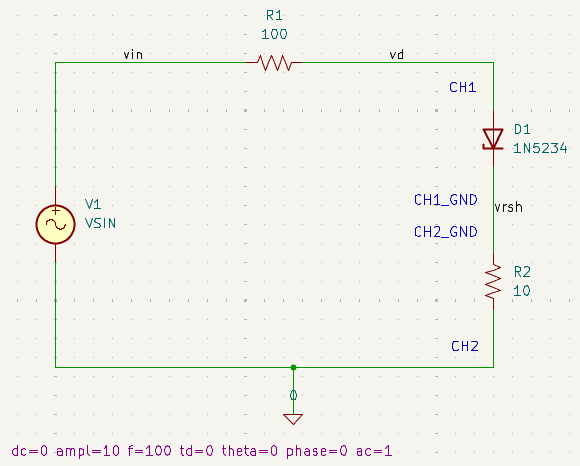

In [9]:
display_image("./data/ch03_05_ep07_01_circuit_cad.png", width=700)

#### 회로 시뮬레이션하기

다음 설정으로 시뮬레이션한다.

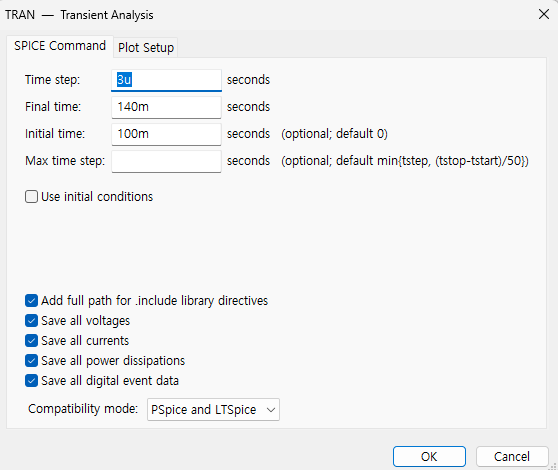

In [10]:
display_image("./images/ch03_05_ep7_01_sim_setting.png", width=700)

#### 시뮬레이션 결과 관찰한기

##### 결과 그래프 관찰

시뮬레이션한 파형을 관찰한다.

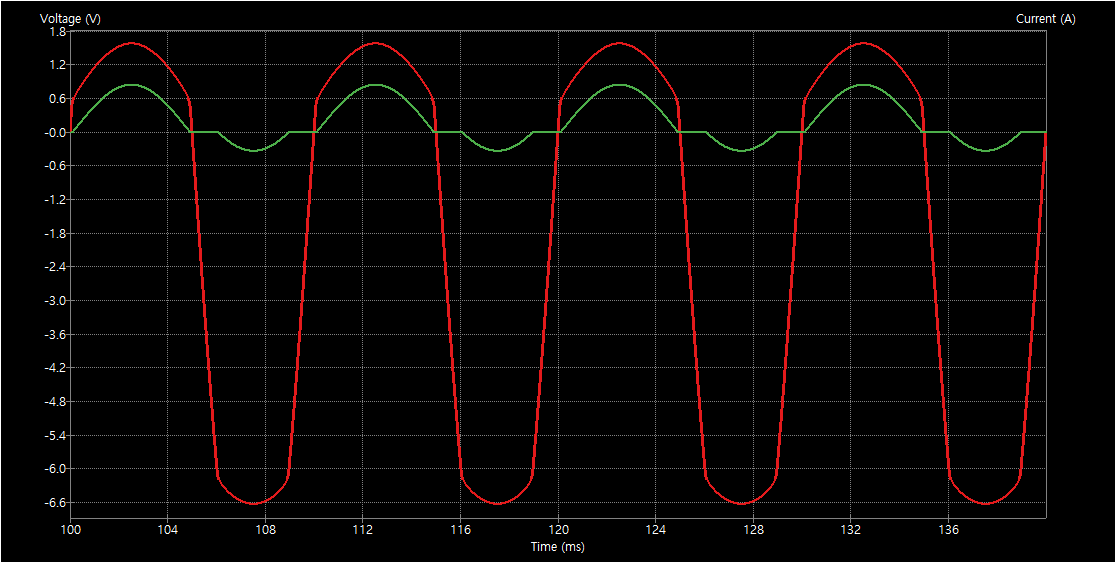

In [11]:
display_image("./data/ch03_05_ep07_02_result_plot.png", width=700)

시뮬레이션한 데이터를 가져온다.

In [12]:
# 실험 결과 파일을 읽는다.
data = get_simulation_result_kicad('./data/ch03_05_ep07_02_result_data.csv')

data['time'] : sample number = 13335
data['V(/vd)'] : sample number = 13335
data['V(/vrsh)'] : sample number = 13335


##### 결과 데이터 분석하기

그래프를 그린다.

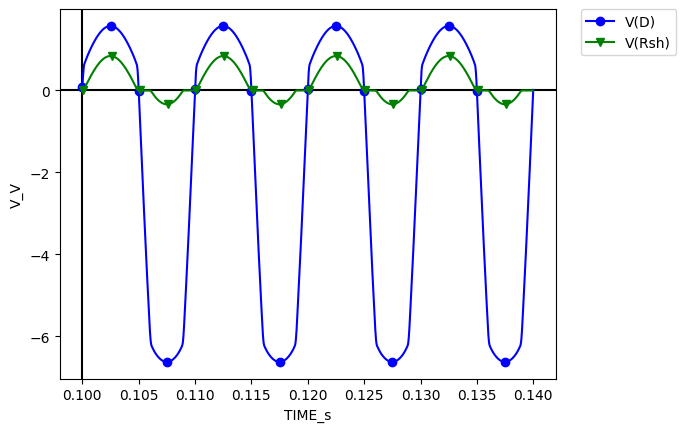

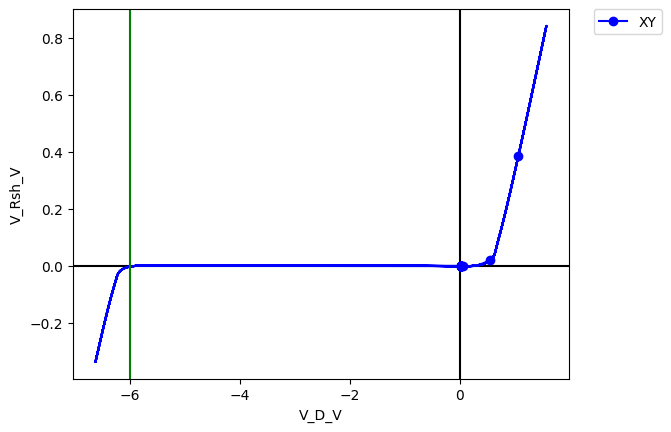

In [13]:

# 실험 결과에서 시간, 입력 전압, 출력 전압을 가져온다.
times = data['time']
vds = data['V(/vd)']
vrshs = data['V(/vrsh)']

# 필터를 적용해 잡음을 줄인다.
vds = savgol_filter(vds, 100, 2)
vrshs = savgol_filter(vrshs, 100, 2)

# y 축 반전시키기
# vrshs = -vrshs

# 시간을 x축, 전압들을 y축으로 하는 그래프를 그린다.
plt.xlabel('TIME_s')
plt.ylabel('V_V')
plt.axhline(0, color='black')
plt.axvline(0.1, color='black')
draw_plot(times, vds, 'V(D)', 0)
draw_plot(times, vrshs, 'V(Rsh)', 1)
plt.show()

# V_D 를 x축, V_Rsh 를 y축으로 하는 그래프를 그린다.
plt.xlabel('V_D_V')
plt.ylabel('V_Rsh_V')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
draw_plot(vds, vrshs, "XY", 0)
plt.axvline(-6.0, color='green')
plt.show()

항복 전압을 계산한다.

* 항복 전압은 대략 6 V 이다.

##### 실험 결과 값 관찰

|          | 시뮬레이션 | 예시값   |
|----------|------------|----------|
| 항복전압 | 6 V        | 6 V      |